# 11. Sympy 及其他相關的小技巧

## 插撥: Azure Notebooks

[Azure Notebooks](https://notebooks.azure.com/) 是 Microsoft 提供的運端 Jupyter, 而且和我們一樣是用 Anaconda 安裝的! 所以你可以不安裝任何東西, 就能直接使用 Python!

如果你想學習很潮的 Deep Learning, 還可以照[老師介紹的方式](http://yenlung-blog.logdown.com/posts/1176889-azure-notebooks-deep-learning)安裝相關套件。


# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sympy import *

## 11-1 很大的質數怎麼求

話說我們作業有一題請大家找很大的孿生質數。結果大家都用 `for` 迴圈配上 `range` 使用。

這裡其實你要想: 我們又不是要找「很多」孿生質數, 只要找出一對, 所以一個想法是...

#### 先設一個很大的數

In [3]:
k = 23112939124712481249812947125105917237

這裡有幾個重點:

1. Python 支援「無限長度」 (假的, 但你要弄爆記憶體也不容易) 整數。
2. 記得 `k` 要取奇數 (當然你也可以自己寫程式判斷)。
3. `k` 和 `k+2` 馬上就是整數的機會差不多是 0... 但是不是我們就一路做上去...

In [4]:
while not(isprime(k) and isprime(k+2)):
    k = k + 2
print("找到一對孿生質數 (p,q)! 其中:")
print("p =", k)
print("q =", k+2)

找到一對孿生質數 (p,q)! 其中:
p = 23112939124712481249812947125105927329
q = 23112939124712481249812947125105927331


## 11-2 Sympy Numpy 互通款曲

這裡我們介紹怎麼讓 `sympy` 和 `numpy` 互通資料。

#### 資料送給 `sympy`

我們把字串、其他型態的資料送給 `sympy` 這樣做。

In [5]:
from sympy.abc import x

In [6]:
f = sympify('3*x**2 - 2*x + 5')

In [7]:
diff(f, x)

6*x - 2

先注意這裡不是「簡化」 (simplify), 而是「`sympy` 化」(sympify)。

這種東西會有什麼好處呢? 好處可多了, 比方說我們寫個函數想隨機定義 d 階多項式。

In [8]:
def polynomial(d):
    st = ""
    for i in range(d+1):
        c = np.random.randint(10)
        if i > 0:
            st = st + "+" + str(c) + "*x**" + str(i)
        else:
            st = str(c)
    return sympify(st)

In [9]:
f = polynomial(5)

In [10]:
f

8*x**5 + 5*x**4 + 5*x**3 + x**2 + 4*x + 1

In [11]:
diff(f, x)

40*x**4 + 20*x**3 + 15*x**2 + 2*x + 4

事實上我們可以簡化 `sympify` 成 `S`。

In [12]:
f = S('2*cos(2*x)')

In [13]:
f

2*cos(2*x)

In [14]:
integrate(f)

sin(2*x)

耶? 這好像有點熟悉... 對了, 這是我們之前要做分數相加時用的。原來下的指令是 `sympify`。

In [15]:
S(2)/3 + S(1)/5

13/15

## `lamdify` 把 `sympy` 函數送回給 Python 或 `numpy`

In [16]:
f = 2*cos(x) + 0.3 * sin(10*x)

In [17]:
g = lambdify(x, f, "numpy")

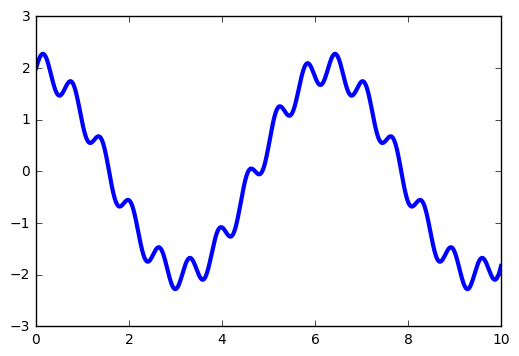

In [18]:
t = np.linspace(0,10,1000)
y = plt.plot(t, g(t), lw=3)

## 11-3 級數

In [19]:
from sympy.abc import n

In [20]:
s = summation(1/x**n, (n,1,10))

In [21]:
s

1/x + x**(-2) + x**(-3) + x**(-4) + x**(-5) + x**(-6) + x**(-7) + x**(-8) + x**(-9) + x**(-10)

可以用 `subs` 代入數字。

In [22]:
s.subs(x,2)

1023/1024

## Taylor 多項式

#### 7 階泰勒展開式

In [23]:
f = series(cos(x), x, n=7)

In [24]:
f

1 - x**2/2 + x**4/24 - x**6/720 + O(x**7)

#### 移去 big O

In [25]:
g = f.removeO()

In [26]:
g

-x**6/720 + x**4/24 - x**2/2 + 1

於是就可以算了。

In [27]:
g.subs(x,3)

-91/80

#### 對 x=3 展開

In [28]:
f = series(sqrt(x), x0=4)

In [29]:
f

1 - (x - 4)**2/64 + (x - 4)**3/512 - 5*(x - 4)**4/16384 + 7*(x - 4)**5/131072 + x/4 + O((x - 4)**6, (x, 4))

一樣可以移除 big O。

In [30]:
f.removeO()

x/4 + 7*(x - 4)**5/131072 - 5*(x - 4)**4/16384 + (x - 4)**3/512 - (x - 4)**2/64 + 1

#### sin 不同階展開的效果

順便展示 `sympy` 客製化圖形的方法。

In [31]:
f = sin(x)
s1 = series(f, n=5)
f1 = s1.removeO()
s2 = series(f, n=10)
f2 = s2.removeO()

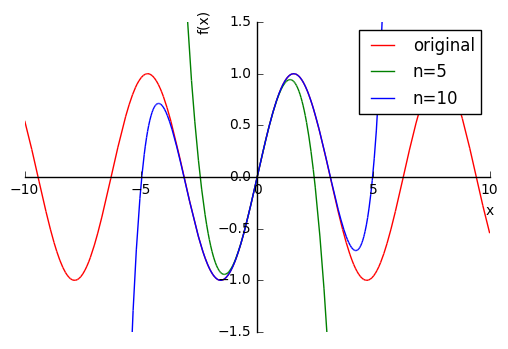

In [32]:
p = plot(f, f1, f2, xlim=(-10,10), ylim=(-1.5,1.5), legend=True, show=False)
p[0].line_color='r'
p[0].label = 'original'
p[1].line_color='g'
p[1].label = 'n=5'
p[2].label = 'n=10'
p.show()

## 11-4 怎麼出題出得「漂亮」?

這又是我們要用跳出思考框框的地方: 有同學想出多項式求解的問題, 但發現因為是亂數取題目, 有時很難解!! 這該如何是好呢? 這很簡單...

我們反過來想, 現弄漂亮的答案再出題就好了!

In [33]:
f = (x-2)*(x-3)

In [34]:
f.expand()

x**2 - 5*x + 6

In [35]:
def quiz():
    s1 = np.random.randint(1,5)
    s2 = np.random.randint(1,5)
    f = expand((x-s1)*(x-s2))
    print("請求下列多項式的根:")
    pprint(f)
    print("---")
    print("兩個根分別為:")
    print(s1,s2)
    

In [36]:
quiz()

請求下列多項式的根:
 2          
x  - 3⋅x + 2
---
兩個根分別為:
2 1


#### 順便題目也印得漂亮

我們可以使用 Jupyter HTML 輸出支援 LaTeX 語法 (透過 MathJax) 的特性。

In [37]:
from IPython.display import HTML, display

In [38]:
html_code = "<h2>題目: $" + latex(f.expand()) + "$</h2>"

In [39]:
display(HTML(html_code))

沒事打打 LaTeX。

In [40]:
html_code = r"<h2>$\sigma=x^2-2x$</h2>"
display(HTML(html_code))

前面為什麼要加上 `r` 呢? 那是 raw 的意思, 和相機的 raw 檔一樣, 就是要 Python 不要亂動我們的文字配置。

## 11-5 多項式的一些屬性

In [41]:
f = 6*x**3 - 2*x**2 + 7*x + 5

每一項的內容。

In [42]:
f.args

(5, -2*x**2, 6*x**3, 7*x)

某項的係數。

In [43]:
f.coeff(x**2)

-2

## 11-6 `lambda` 快速建立一個函數

前面示範怎麼用 `lambdify` 把 `sympy` 表示式變成 Python 「正常」的函數。你可能會覺得奇怪, 這指令的名稱怎麼來的? 原來是 Python 原本就有個 `lambda` 指令, 可以快速建立一個函數。比如說原本我們應該這樣定義的函數

    def h(t):
        return t**2
        
我們可以快速寫成這樣:

In [44]:
h = lambda t: t**2

In [45]:
h(3)

9

再看個例子

In [46]:
is_even = lambda t: t % 2 == 0

In [47]:
is_even(3)

False

In [48]:
is_even(2)

True

我們常會要對一個 list 每個元素做同樣的動作。這時常會要

    map(函數, list)
    
而我們要把結果變成一個 list 可以這樣下指令:

    list(map(函數, list))
    
比方說我們想去掉下面這個 list 中是標準檔案讀進來的, 現在我們要除去每個字串的 "`\n`"。

In [49]:
lines = ["我們使用的 Python\n", "字串處理能力很強\n", "所以大家很愛用\n"]

In [50]:
list(map(lambda st: st.rstrip("\n"), lines))

['我們使用的 Python', '字串處理能力很強', '所以大家很愛用']